<a href="https://colab.research.google.com/github/Ghada6336/Youtube_comment_analysis/blob/main/Youtube_comments_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries



In [10]:
!pip install vaderSentiment

import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


# Download NLTK resources


In [11]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True





# Load the dataset


In [13]:
data = pd.read_csv("/Youtube_comments.csv")

<ipython-input-13-78444bc829e9>:1: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/Youtube_comments.csv")


In [14]:
data.head()

,Unnamed: 0,video_id,comment_text,likes,replies
0,0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,4,XpVt6Z1Gjjo,trending 😉,3,0



#data cleaning



In [18]:
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    return text

data['cleaned_comments'] = data['comment_text'].apply(clean_text)



Tokenization and Stopwords Removal

In [19]:
stop_words = set(stopwords.words('english'))

def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

data['tokens'] = data['cleaned_comments'].apply(tokenize_and_remove_stopwords)


Vectorization

In [23]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['cleaned_comments'])


# Topic Modeling
Using Latent Dirichlet Allocation (LDA)


In [24]:
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf_matrix)

def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))

tfidf_feature_names = vectorizer.get_feature_names_out()
display_topics(lda, tfidf_feature_names, 10)


Topic 0:
trending is this on the beautiful yes views why omg
Topic 1:
you so this the love is my and to it
Topic 2:
the to and it of you is that this in
Topic 3:
love the this is it song wow you of what
Topic 4:
amazing awesome this is you the love please great hi


# Sentiment Analysis

In [27]:
analyzer = SentimentIntensityAnalyzer()

def sentiment_analysis(text):
    return analyzer.polarity_scores(text)

data['sentiment'] = data['cleaned_comments'].apply(sentiment_analysis)


# Displaying the topics


In [26]:
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i]
              for i in topic.argsort()[:-num_top_words - 1:-1]]))


display_topics(lda, vectorizer.get_feature_names_out(), 10)

Topic #0:
trending is this on the beautiful yes views why omg
Topic #1:
you so this the love is my and to it
Topic #2:
the to and it of you is that this in
Topic #3:
love the this is it song wow you of what
Topic #4:
amazing awesome this is you the love please great hi






# Engagement Metrics


In [ ]:
# need to work on it

# Visualization and Reporting
Word Cloud


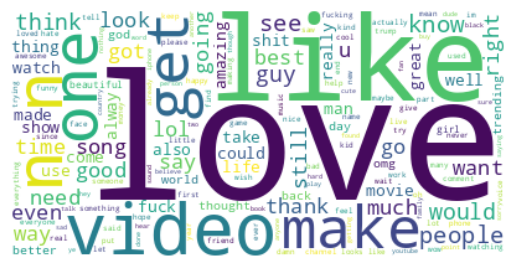

In [29]:
text = " ".join(review for review in data.cleaned_comments)
wordcloud = WordCloud(stopwords=stop_words, background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Sentiment Distribution


In [ ]:
sns.histplot(data['sentiment'].apply(lambda x: x['compound']), bins=20, kde=True)
plt.title('Sentiment Distribution')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.show()



# Sentiment distribution plot


In [ ]:
sentiment_counts = data['sentiment'].value_counts()
sns.barplot(x=sentiment_counts.index,
            y=sentiment_counts.values, palette='viridis')
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()

# Summary report

In [ ]:
# related to Engagement Metrics that I need to work on it
#summary_report = engagement_metrics.describe()
#print(summary_report)

# Save the results to a CSV file
data.to_csv('processed_youtube_comments.csv', index=False)